In [ ]:
import pandas as pd

# Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір).

In [ ]:
with open("/content/Lys_mykyta.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

In [ ]:
text_data

"Казка.укр - дитячі книги з малюнками \nукраїнською мовою онлайн\nІван Франко\nЛис Микита\nЗа редакцією Максима Рильского\nІлюстрації – С.Артюшенко\n\n\nПісня перша\nНадійшла весна прекрасна,\nМногоцвітна, тепла, ясна,\nМов дівчина у вінку;\nОжили луги, діброви,\nПовно гамору, розмови\nІ пісень в чагарнику.\n\nЛев, що цар є над звірами,\nПише листи з печатками,\nРозсилає на весь світ:\nВ тих листах велить він строго,\nЩоб посходився до нього\nВ мить увесь звірячий рід.\n\nОсь ідуть вони юрбами –\nТі безхвості, ті з хвостами.\nВсе, що виє, гавка, квака;\nЛиш один мов і не чує,\nВ своїм замку, знай, ночує –\nЛис Микита, розбишака.\n\nОй, недаром він сховався!\nПевне, слухать побоявся,\nЩо звірячий скаже люд.\nА тим часом у столиці\nЦар засів біля цариці,\nЩоб творити звірам суд.\n\nПерший вийшов Вовк Неситий:\n– Царю, – каже, – від Микити\nВже мені хоч пропадать!\nДіток моїх б'є, кусає,\nА Вовчицю обмовляє\nТак, що й сором повідать!\n\nА й мене – хіба ж то чесно? –\nЯк він хитро і облесн

In [ ]:
import re

def preprocess_text(text):
    # Normalize to lowercase
    text = text.lower()

    # Remove unnecessary characters
    text = re.sub(r"[^\w\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Handle line breaks (replace with space in this example)
    text = text.replace("\n", " ")

    return text

preprocessed_text = preprocess_text(text_data)

In [ ]:
with open("prep.txt", "w") as f:
    f.write(preprocessed_text)

In [ ]:
with open("prep.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

text_data

'казкаукр дитячі книги з малюнками українською мовою онлайн іван франко лис микита за редакцією максима рильского ілюстрації сартюшенко пісня перша надійшла весна прекрасна многоцвітна тепла ясна мов дівчина у вінку ожили луги діброви повно гамору розмови і пісень в чагарнику лев що цар є над звірами пише листи з печатками розсилає на весь світ в тих листах велить він строго щоб посходився до нього в мить увесь звірячий рід ось ідуть вони юрбами ті безхвості ті з хвостами все що виє гавка квака лиш один мов і не чує в своїм замку знай ночує лис микита розбишака ой недаром він сховався певне слухать побоявся що звірячий скаже люд а тим часом у столиці цар засів біля цариці щоб творити звірам суд перший вийшов вовк неситий царю каже від микити вже мені хоч пропадать діток моїх бє кусає а вовчицю обмовляє так що й сором повідать а й мене хіба ж то чесно як він хитро і облесно мало в гріб раз не ввігнав це було ще того разу як я з царського указу мировим суддею став от до мене вбіг микита 

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenized_datasets = TextDataset(
    tokenizer=tokenizer,
    file_path="/content/prep.txt",
    block_size=128
)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
model = GPT2LMHeadModel.from_pretrained("gpt2")

training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=2,
    save_steps=10_000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    ),
    train_dataset=tokenized_datasets,
)

trainer.train()

Step,Training Loss
500,2.018600
1000,1.813400
1500,1.718300


TrainOutput(global_step=1770, training_loss=1.824156180344059, metrics={'train_runtime': 202.5759, 'train_samples_per_second': 17.45, 'train_steps_per_second': 8.737, 'total_flos': 230916833280000.0, 'train_loss': 1.824156180344059, 'epoch': 5.0})

In [ ]:
seed_text = "микита вдарив "

# Tokenize the seed text
input_ids = tokenizer.encode(seed_text, return_tensors="pt")
input_ids = input_ids.to(model.device)
# Generate text
output = model.generate(
    input_ids,
    max_length=100,  # Adjust the length as needed
    temperature=0.7,  # Adjust the temperature for randomness
    num_beams=5,  # Adjust the number of beams for diversity
    no_repeat_ngram_size=2,  # Avoid repetition of n-grams
    top_k=50,  # Adjust the top-k sampling
    top_p=0.9,  # Adjust the top-p sampling
)

# Decode the generated output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


микита вдарив щоб мій сказав несибать ти почувались лиш розповах дуже була як злодину голо�


# Проведіть експерименти з моделями бібліотеки HF Transformers (https://huggingface.co/) за допомогою (наприклад) Pipeline модуля

In [ ]:
from transformers import pipeline

# Create a text generation pipeline with a GPT-2 model
text_generation_pipeline = pipeline("text-generation", model="benjamin/gpt2-large-wechsel-ukrainian", device=0)  # Adjust the model name as needed

# Generate text using the pipeline
prompt = "микита вдарив "
generated_text = text_generation_pipeline(prompt, max_length=100, temperature=0.7, num_return_sequences=1)[0]['generated_text']

# Print the generated text
print("Generated Text:")
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
микита вдарив шейха. Коли шейх відштовхнув шейха, я з усієї сили ударив у груди шейха. А я, за словами очевидців, вдарив у голову, тому що був поранений в голову. Нападники зникли, а я залишився лежати на землі. Потерпілий, який опинився поруч, викликав швидку, і мене госпіталізували.
– Це була помста за мою боротьбу з корупцією. Я не міг дозволити собі такої розкоші, як дорогі автомобілі,


# Завдання щодо генерації або стилізації зображень (на вибір) Вирішіть завдання перенесення стилю або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE).

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import tensorflow as tf
from keras.applications import vgg19

base_image_path  = tf.keras.utils.get_file('monkey.jpeg', 'https://media.npr.org/assets/img/2015/09/23/ap_836720500193-13f1674f764e5180cf9f3349cfef258d181f2b32-s1100-c50.jpg')

style_reference_image_path  = tf.keras.utils.get_file('tt.jpg','https://forthewall.art/_next/image?url=https%3A%2F%2Fftw-assets.s3.eu-west-1.amazonaws.com%2Foriginals%2Fclgjjku8l000108mi8sqxg3k2.png&w=3840&q=75')
result_prefix = "generated"

# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height = keras.utils.load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

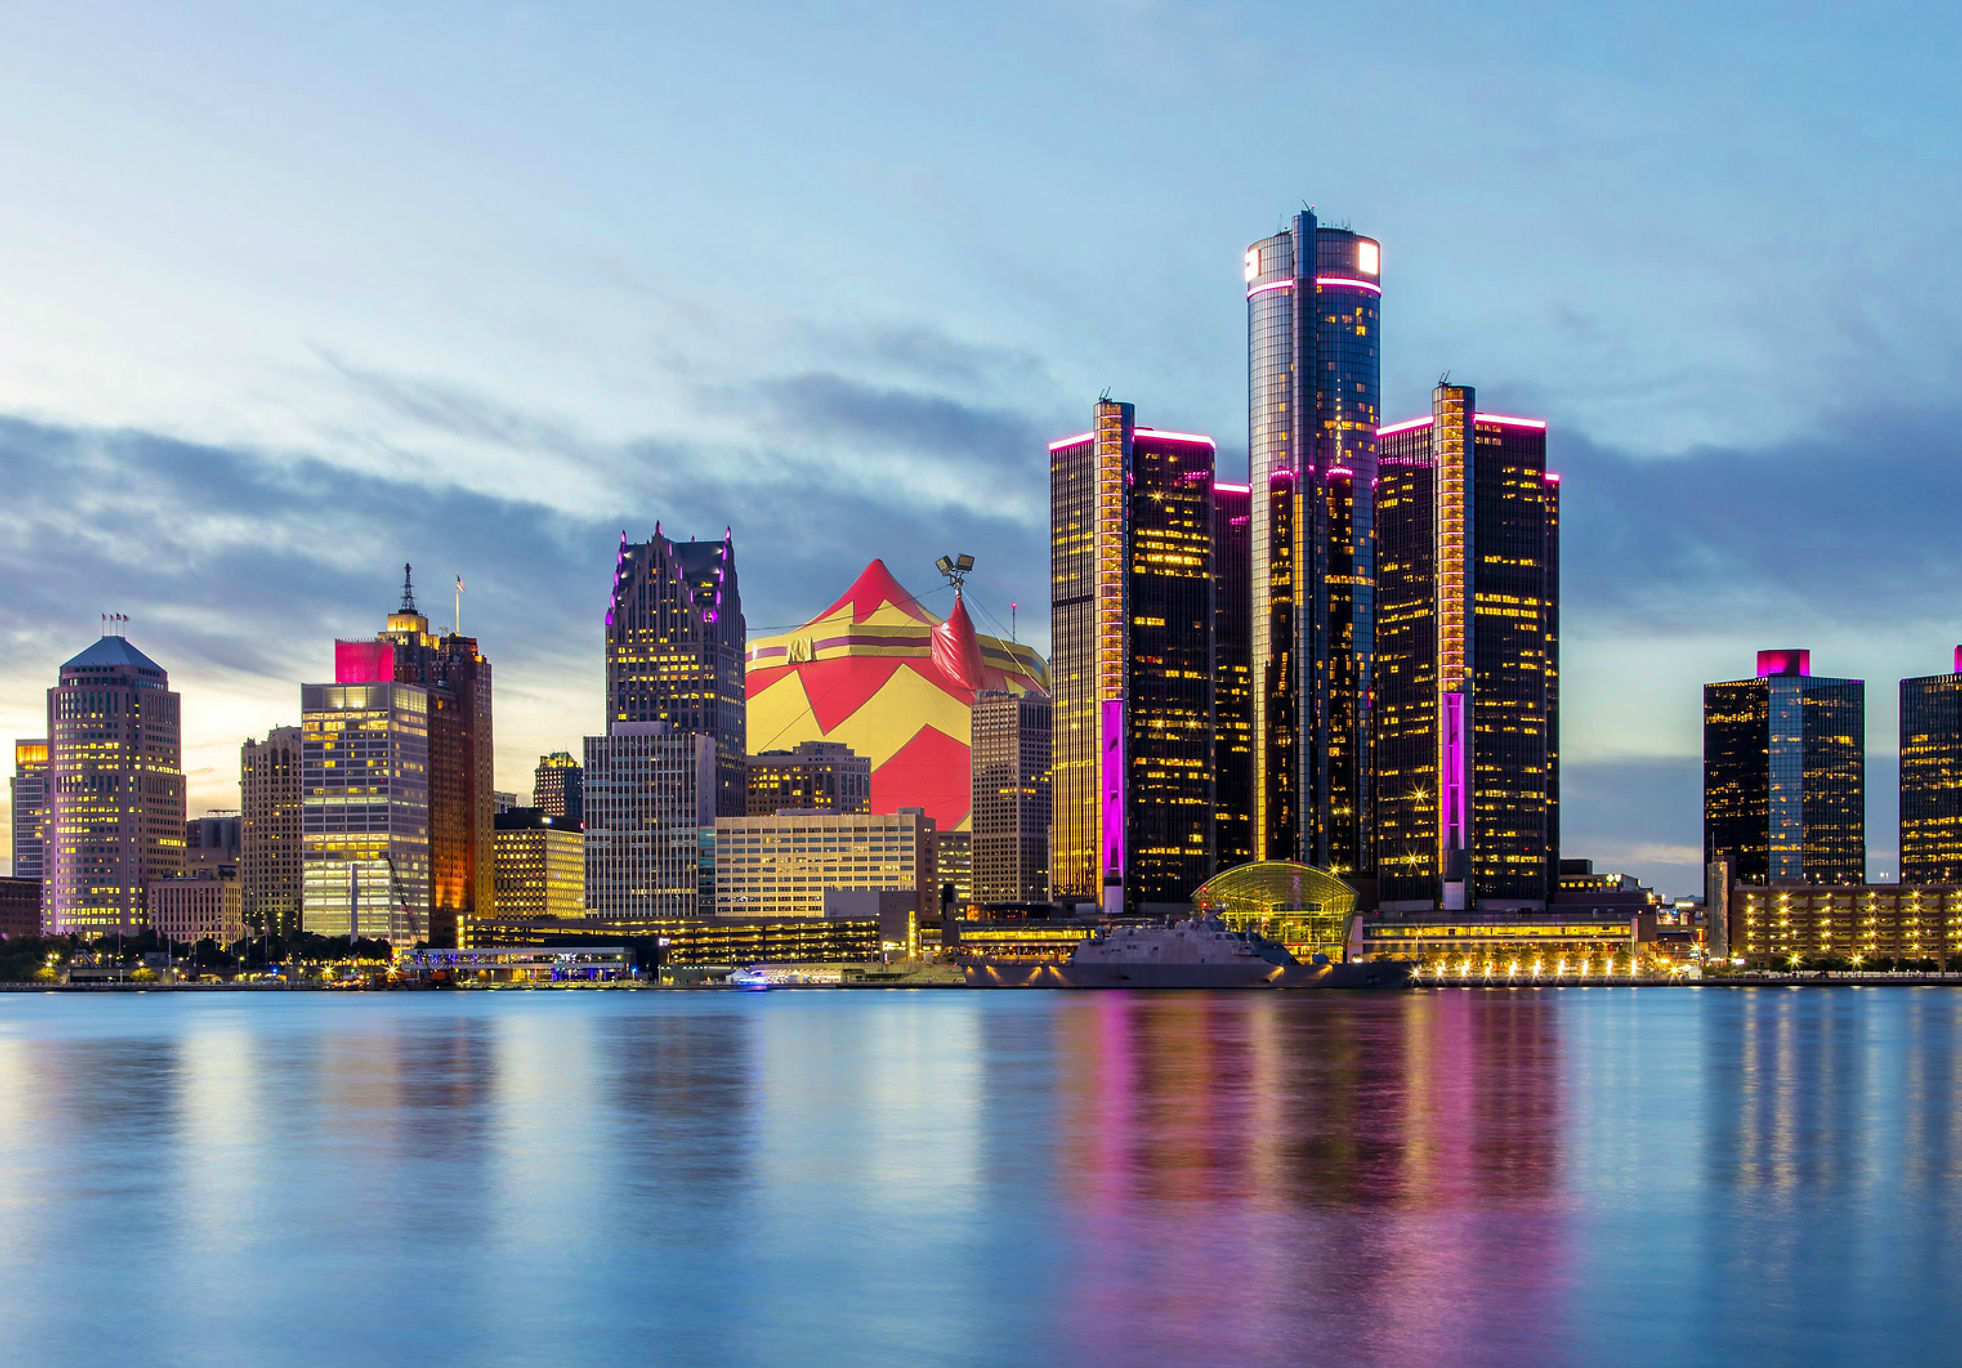

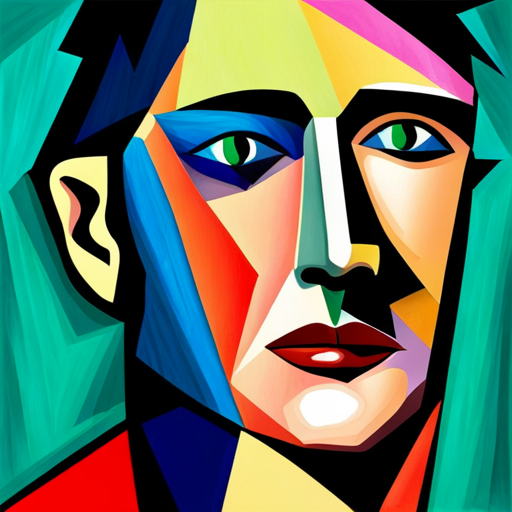

In [ ]:
from IPython.display import Image, display

display(Image(base_image_path))
display(Image(style_reference_image_path))

In [ ]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures into appropriate tensors
    img = keras.utils.load_img(image_path, target_size=(img_nrows, img_ncols))
    img = keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [ ]:
def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram


# The "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))


# An auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))


# The 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [ ]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss

In [ ]:
@tf.function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads

In [ ]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96
    )
)

base_image = preprocess_image(base_image_path)
style_reference_image = preprocess_image(style_reference_image_path)
combination_image = tf.Variable(preprocess_image(base_image_path))

iterations = 4000
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    if i % 100 == 0:
        print("Iteration %d: loss=%.2f" % (i, loss))
        img = deprocess_image(combination_image.numpy())
        fname = result_prefix + "_at_iteration_%d.png" % i
        keras.utils.save_img(fname, img)

Iteration 100: loss=11724.24
Iteration 200: loss=8558.39
Iteration 300: loss=7945.10
Iteration 400: loss=6249.47
Iteration 500: loss=5772.17
Iteration 600: loss=5417.42
Iteration 700: loss=5144.60
Iteration 800: loss=4927.61
Iteration 900: loss=4749.93
Iteration 1000: loss=4599.47
Iteration 1100: loss=4471.89
Iteration 1200: loss=4361.34
Iteration 1300: loss=4265.30
Iteration 1400: loss=4180.63
Iteration 1500: loss=4104.96
Iteration 1600: loss=4037.61
Iteration 1700: loss=3976.46
Iteration 1800: loss=3920.81
Iteration 1900: loss=3870.21
Iteration 2000: loss=3823.64
Iteration 2100: loss=3780.94
Iteration 2200: loss=3741.51
Iteration 2300: loss=3705.54
Iteration 2400: loss=3672.46
Iteration 2500: loss=3641.73
Iteration 2600: loss=3613.09
Iteration 2700: loss=3586.26
Iteration 2800: loss=3561.24
Iteration 2900: loss=3537.84
Iteration 3000: loss=3515.97
Iteration 3100: loss=3495.57
Iteration 3200: loss=3476.42
Iteration 3300: loss=3458.47
Iteration 3400: loss=3441.60
Iteration 3500: loss=3

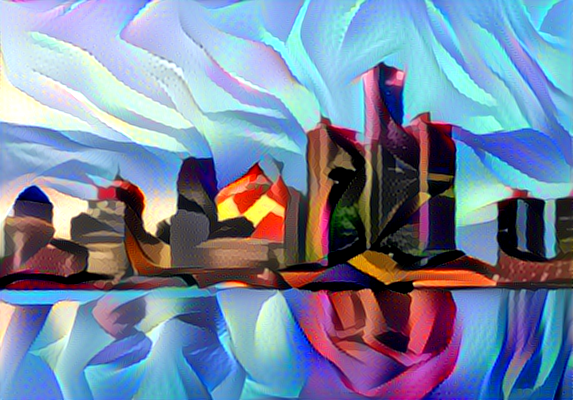

In [ ]:
display(Image(result_prefix + "_at_iteration_4000.png"))